In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as dset
from torchvision import datasets, transforms
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('GPU State:', device)
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,)),]
)

trainSet = datasets.MNIST(root='MNIST', download=True, train=True, transform=transform)
testSet = datasets.MNIST(root='MNIST', download=True, train=False, transform=transform)
trainLoader = dset.DataLoader(trainSet, batch_size=64, shuffle=True)
testLoader = dset.DataLoader(testSet, batch_size=64, shuffle=False)

GPU State: cuda:0


In [26]:
ts = datasets.MNIST(root='MNIST')
for n in dir(ts):
    if not n.startswith("_"):
        print(n)

print(ts.class_to_idx)
print(type(ts.train_data))

class_to_idx
classes
data
download
extra_repr
extract_gzip
processed_folder
raw_folder
root
target_transform
targets
test_data
test_file
test_labels
train
train_data
train_labels
training_file
transform
transforms
urls
{'0 - zero': 0, '1 - one': 1, '2 - two': 2, '3 - three': 3, '4 - four': 4, '5 - five': 5, '6 - six': 6, '7 - seven': 7, '8 - eight': 8, '9 - nine': 9}
<class 'torch.Tensor'>


/home/brucesz/anaconda3/envs/torch/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
(1797, 64)
feature name:  pixel_0_0
None
data:  [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(8, 8)
target:  0
data:  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
data type:  <class 'numpy.ndarray'>


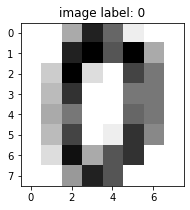

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()
print(dir(digits))
print(digits.data.shape)
print("feature name: ",digits.feature_names[0])
print(digits.frame)
print("data: ",digits.images[0])
print(digits.images[0].shape)
print("target: ",digits.target[0])
print("data: ", digits.data[0])
print("data type: ", type(digits.data[0]))

sample_index = 0
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);
    

In [163]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

def get_train_test():
    
    data = np.asarray(digits.data, dtype='float32')
    target = np.asarray(digits.target, dtype='int32')

    X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=0.15, random_state=37)

    # mean = 0 ; standard deviation = 1.0
    scaler = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

def get_one_hot(n_classes, idx):
    return np.eye(n_classes)[idx]

def softmax(X):
    expV = np.exp(X)
    return expV / np.sum(expV, axis=-1, keepdims=True)

def compute_llk(Y_true, Y_pred):
    """ should be a vector for both input parameter."""
    EPS = 1e-8
    Y_hat = np.atleast_2d(Y_true)
    Y_pred = np.atleast_2d(Y_pred)
    # lines are batch number
    # sum for each row to compute the cross-entrophy score.
    llk  = np.sum(np.log(EPS + Y_pred) * Y_hat, axis=-1)
    # return negative mean as this batchs' cross-entryphy score. 
    return -np.mean(llk)

#class MultiPerception(object):
#    def __init__(self):



def forward(X):
    z = np.dot(X, W) + B
    return softmax(z)

def predict(X):
    tmp = forward(X)
    #print(tmp)
    #print("shape of x: ", X.shape)
    if len(X.shape) == 1:
        return np.argmax(tmp)
    else:
        return np.argmax(tmp, axis=1)

def compute_loss(X, y):
    o = forward(X)
    one_hot = get_one_hot(10, y)
    return compute_llk(one_hot, o)

def train_algo(x,y,lr):
    global W,B
    y_pred = predict(x)
    # see : https://www.cnblogs.com/wuliytTaotao/p/10787510.html
    # loss relate  to z
    
    #print("y pred is: ", y_pred)
    
    dz = y_pred - get_one_hot(output_size, y)
    # x * dz -> gradW
    gradW = np.outer(x, dz)
    # 1 * dz -> dz
    gradB = dz
    
    W = W - lr * gradW
    B = B - lr * gradB
    
    
# refer: https://blog.csdn.net/u011119817/article/details/104602195    

In [162]:
import numpy as np

input_size = 64
output_size = 10
W = np.random.uniform(size=(input_size, output_size), high=0.1, low=-0.1)
B = np.random.uniform(size=output_size, high=0.1, low=-0.1)


train, test, y_train, y_test = get_train_test()
print(train.shape)
print(test.shape)
print(np.eye(3))
print(np.eye(3).shape)

print(np.eye(3)[0].shape)

# (1527, 64)
# (270, 64)
# [[1. 0. 0.]
# [0. 1. 0.]
# [0. 0. 1.]]
# (3, 3)
# (3,)

target = softmax([1,0,0])
print(target)


target2 = softmax([[0,1,0],[1,0,0]])
print(target2)

np.log([1,1,1])

xx = np.atleast_2d([1,2])
print(xx)
print(np.mean(xx))


np.array([1,2,3]) * np.array([1,2,3])

tmpx = np.array([[1,0,0],[0,2,3],[0,0,1]])
tmpy = np.array([1,2,3])
print(tmpx * tmpy)
print(np.dot(tmpx, tmpy))
print(tmpx)
np.argmax(tmpx,axis=0)

print(np.outer([1,2],[2,3]))

print(np.outer([2,3],[1,2]))

print(train.shape)
print(y_train.shape)


def eval(train, y_train):

    n_features = train.shape[1]
    n_classes = len(np.unique(y_train))
    #lr = LogisticRegression(n_features, n_classes)

    print("Evaluation of the untrained model:")
    loss  = compute_loss(train, y_train)
    print("avg loss is: ",np.mean(loss))
    #train_loss = lr.loss(X_train, y_train)
    #train_acc = lr.accuracy(X_train, y_train)
    #test_acc = lr.accuracy(X_test, y_test)

    #print("train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
    #      % (train_loss, train_acc, test_acc))
epoch = 5
eval(test, y_test)

for j in range(epoch):
    for i in range(len(train)):
        train_algo(train[i],y_train[i],0.01)
    eval(test, y_test)

#eval(test, y_test)




(1527, 64)
(270, 64)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
(3, 3)
(3,)
[0.57611688 0.21194156 0.21194156]
[[0.21194156 0.57611688 0.21194156]
 [0.57611688 0.21194156 0.21194156]]
[[1 2]]
1.5
[[1 0 0]
 [0 4 9]
 [0 0 3]]
[ 1 13  3]
[[1 0 0]
 [0 2 3]
 [0 0 1]]
[[2 3]
 [4 6]]
[[2 4]
 [3 6]]
(1527, 64)
(1527,)
Evaluation of the untrained model:
avg loss is:  2.1492089540669164
Evaluation of the untrained model:
avg loss is:  0.9365092217688873
Evaluation of the untrained model:
avg loss is:  1.5444642644535653
Evaluation of the untrained model:
avg loss is:  1.8612130256969468
Evaluation of the untrained model:
avg loss is:  nan
Evaluation of the untrained model:
avg loss is:  nan


/home/brucesz/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/home/brucesz/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp
